Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


Load the Data

In [2]:
df=pd.read_csv("HR_Analytics.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


Describe Dataset

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
#Get the Number of Rows and Columns
df.shape

(1470, 35)

Get the Column Data Type

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Check Unique Values

In [8]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Check Missing Values

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

Check Skewness

In [12]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [13]:
#dropping the column since value is not changing
df = df.drop(['EmployeeCount','StandardHours'], axis = 1)

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [15]:
#lets change attrition to binary
df['Attrition']=df['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [16]:
df=pd.get_dummies(df)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


# EDA

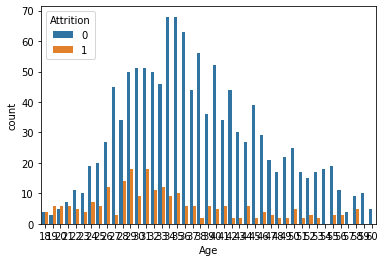

In [17]:
sns.countplot(df['Age'],hue=df['Attrition'])

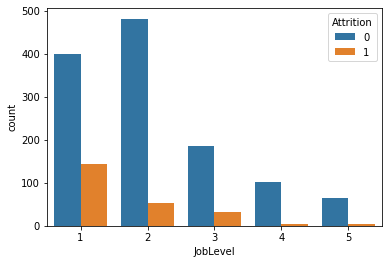

In [18]:
sns.countplot(df['JobLevel'],hue=df['Attrition'])

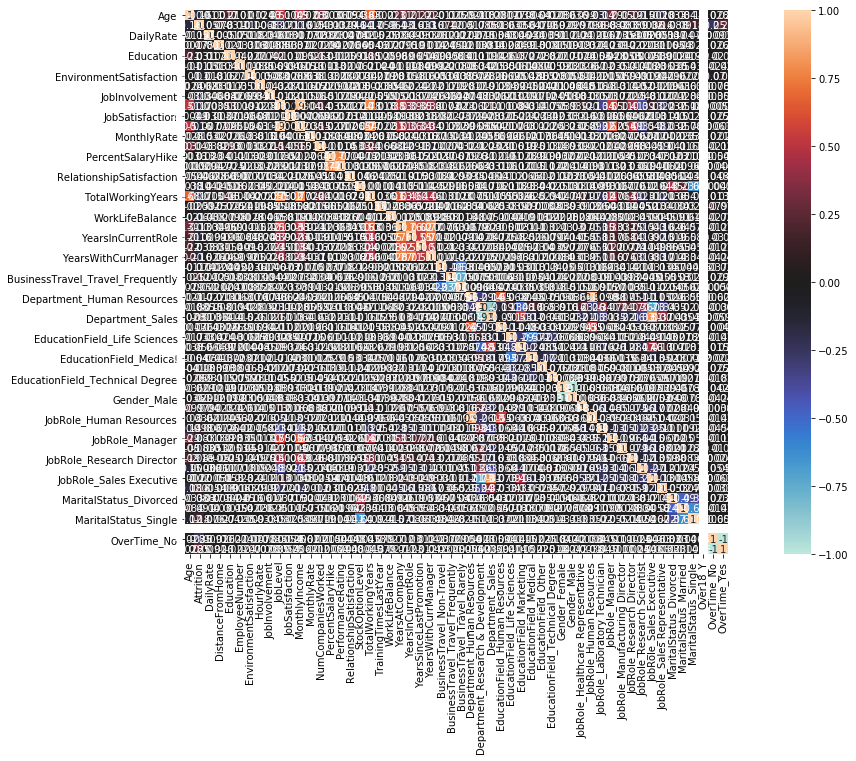

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,square=True,center=0)
plt.show()

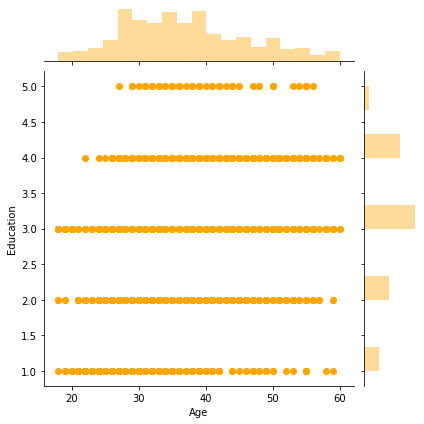

In [20]:
sns.jointplot(x='Age',y='Education',data=df, color='orange')

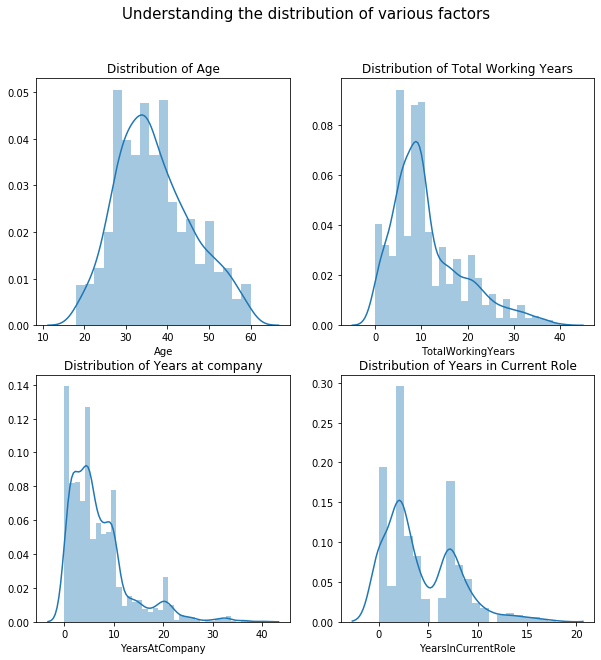

In [21]:
fig,ax = plt.subplots(2,2, figsize=(10,10))
plt.suptitle("Understanding the distribution of various factors", fontsize=15)
sns.distplot(df['Age'], ax = ax[0,0]) 
ax[0][0].set_title('Distribution of Age')
sns.distplot(df['TotalWorkingYears'], ax = ax[0,1])  
ax[0][1].set_title('Distribution of Total Working Years')
sns.distplot(df['YearsAtCompany'], ax = ax[1,0])  
ax[1][0].set_title('Distribution of Years at company')
sns.distplot(df['YearsInCurrentRole'], ax = ax[1,1])
ax[1][1].set_title('Distribution of Years in Current Role')
plt.show()                                                

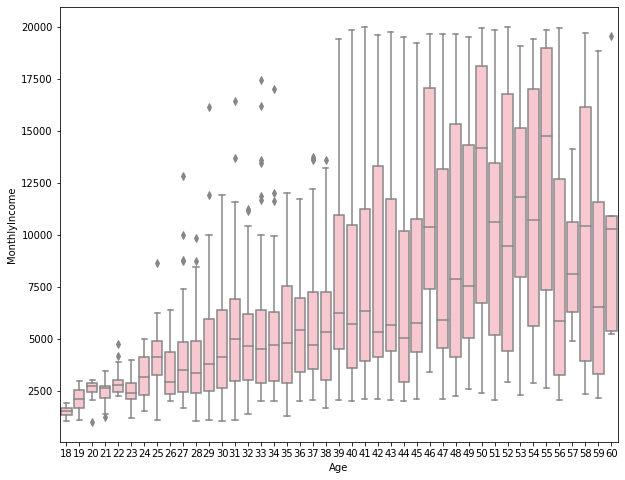

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.boxplot(x='Age',y='MonthlyIncome',data=df,color='pink')

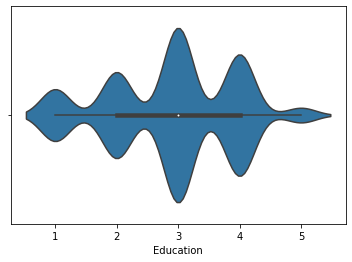

In [23]:
sns.violinplot(x="Education", data=df)
plt.show()

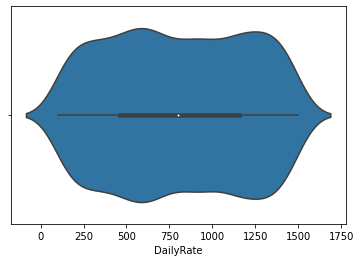

In [24]:
sns.violinplot(x="DailyRate", data=df)
plt.show()

Text(0.5, 1.0, 'Job Satisfaction with respect to Monthly Income')

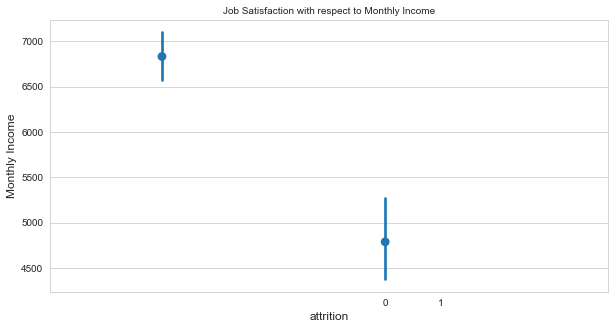

In [25]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.pointplot(x='Attrition',y='MonthlyIncome',data=df,join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('attrition',{'fontsize' : 'large'})
plt.ylabel('Monthly Income',{'fontsize':'large'})
plt.title("Job Satisfaction with respect to Monthly Income",{'fontsize':10})

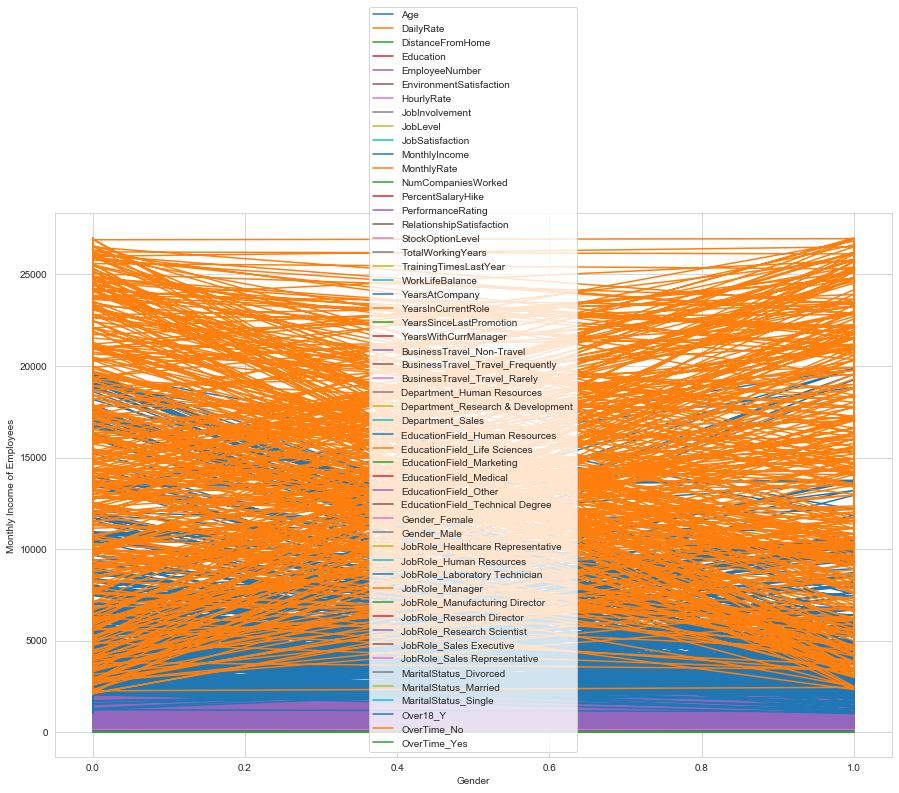

In [26]:
ax = df.set_index('Attrition').plot(figsize=(15, 10))
ax.set_ylabel('Monthly Income of Employees')
ax.set_xlabel('Gender')

plt.show()

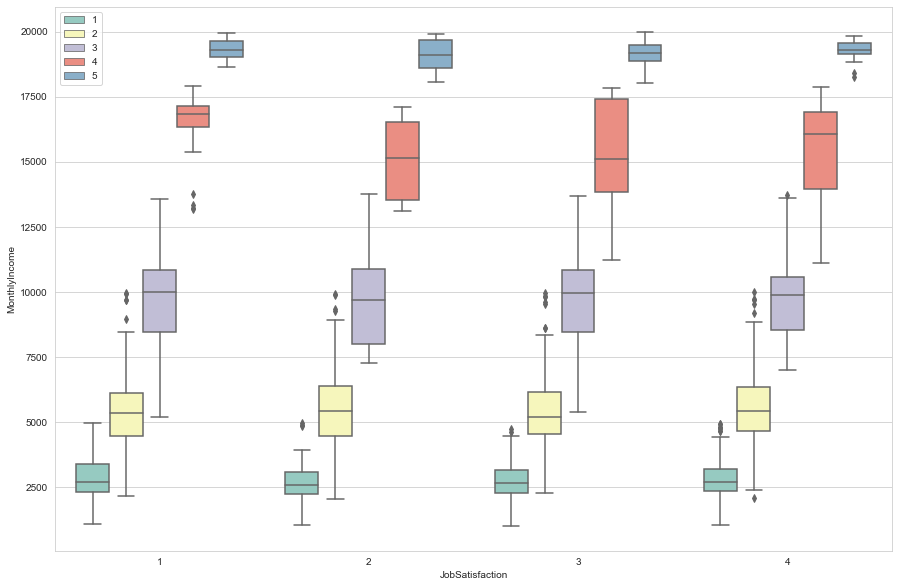

In [27]:
f,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=df, hue='JobLevel',palette='Set3')
plt.legend(loc='best')
plt.show()

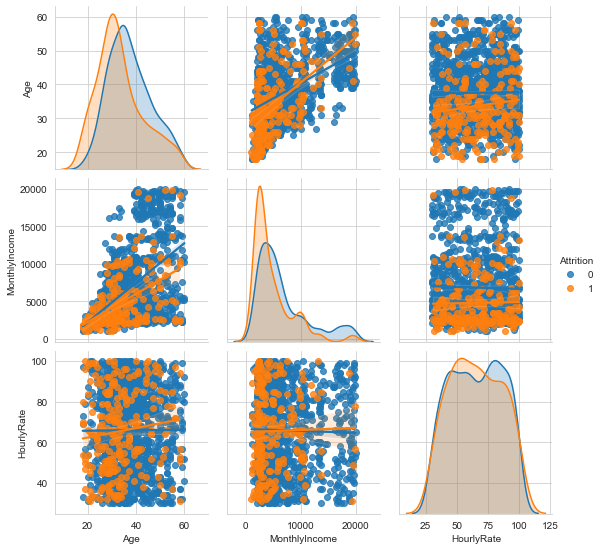

In [28]:
data = ['Attrition','Age','MonthlyIncome','HourlyRate']
sns.pairplot(df[data], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()

Preprocessing

In [29]:
x =df.drop(['Attrition'], axis=1)
y=df['Attrition']

In [30]:
sdr = StandardScaler()
x = sdr.fit_transform(x)

Train-Test-Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state=42)

In [32]:
def train_test_model(x_train,y_train,x_test,Model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 

    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')


In [33]:
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

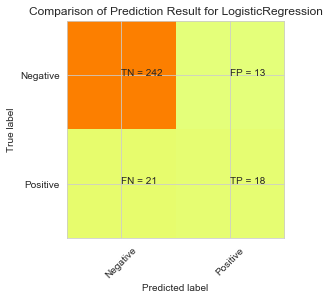

Accuracy of the Model LogisticRegression 88.4%


In [34]:
Model = "LogisticRegression"
model=LogisticRegression()

train_test_model(x_train,y_train,x_test,Model)

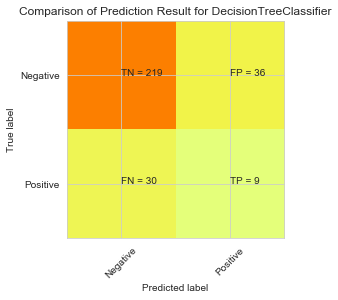

Accuracy of the Model DecisionTreeClassifier 77.6%


In [35]:
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_model(x_train,y_train,x_test,Model)

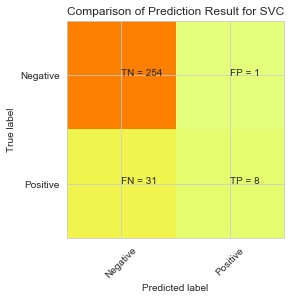

Accuracy of the Model SVC 89.1%


In [36]:
Model = "SVC"
model=SVC() 
train_test_model(x_train,y_train,x_test,Model)

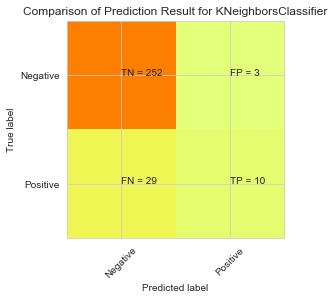

Accuracy of the Model KNeighborsClassifier 89.1%


In [37]:
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_model(x_train,y_train,x_test,Model)

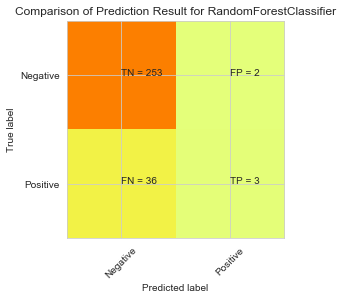

Accuracy of the Model RandomForestClassifier 87.1%


In [38]:
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_model(x_train,y_train,x_test,Model)

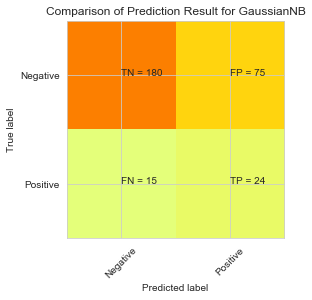

Accuracy of the Model GaussianNB 69.4%


In [39]:
Model = "GaussianNB"
model=GaussianNB()

train_test_model(x_train,y_train,x_test,Model)

In [40]:
predictions=model.predict(x_test)

In [41]:
print('Classfication Report - \n',classification_report(y_test,predictions))
print('\n')
print('confusion_matrix  - \n',confusion_matrix(y_test,predictions))

Classfication Report - 
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       255
           1       0.24      0.62      0.35        39

    accuracy                           0.69       294
   macro avg       0.58      0.66      0.57       294
weighted avg       0.83      0.69      0.74       294



confusion_matrix  - 
 [[180  75]
 [ 15  24]]


In [42]:
print('Accuracy of the Model -',accuracy_score(y_test,predictions))

Accuracy of the Model - 0.6938775510204082


In [43]:
from sklearn.externals import joblib
joblib.dump(Model,'HR_Analytics.obj')

['HR_Analytics.obj']